# **NT522.P21.ANTT - Lab 5**

# **Phát hiện bất thường mạng sử dụng mô hình GRU**
Trong bài thực hành này, ta sẽ tạo và huấn luyện mô hình GRU để phát hiện xâm nhập mạng.


# **A. Hướng dẫn xây dựng mô hình phân loại 2 lớp**





## **1. Đọc tập dữ liệu KDD99**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from tensorflow.keras.utils import get_file
try:
    path = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('Error downloading')
    raise

print(path)

In [ ]:
df = pd.read_csv(path, header=None)
print("Read {} rows.".format(len(df)))

In [ ]:
# CSV không có header
df.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
              'num_failed_logins','logged_in','num_compromised','root_shell', 'su_attempted','num_root','num_file_creations','num_shells',
              'num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
              'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
              'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
              'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome']
df.head()

## **2. Xử lý dữ liệu**

In [ ]:
df.shape

In [ ]:
df.dropna(inplace=True,axis=1)
df.shape

In [ ]:
df.dtypes

In [ ]:
df.groupby('outcome')['outcome'].count()

## **3. Encode dữ liệu số và chữ**

In [ ]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [ ]:
#encoding feature vector
text_col =['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', ]

for i in df.columns:
  if i not in text_col:
    if i != 'outcome':
      encode_numeric_zscore(df, i)

for x in text_col:
  encode_text_dummy(df, x)

In [ ]:
df.dropna(inplace=True,axis=1)
df[0:5]

In [ ]:
df['protocol_type-tcp'].unique()

In [ ]:
df.loc[df["outcome"] != "normal.", "outcome"] = 1
df.loc[df["outcome"] == "normal.", "outcome"] = 0

In [ ]:
y = df['outcome']
df.drop('outcome',axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, y,  test_size=0.3, random_state=12)

print(f"Normal train count: {x_train.shape, y_train.shape}")
print(f"Normal test count: {x_test.shape, y_test.shape}")

In [ ]:
y_train = tf.one_hot(y_train.values, 2)
y_test = tf.one_hot(y_test.values, 2)

## **4. Kiến trúc mô hình GRU**

In [ ]:
model = keras.Sequential()
model.add(keras.layers.GRU(units=64, input_shape=(x_train.shape[1],1)))
model.add(keras.layers.Dropout(rate=0.8))
model.add(keras.layers.Dense(units=y_train.shape[1], activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

## **5. Huấn luyện mô hình**

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=2,
    batch_size=1024,
    validation_split=0.2,
    shuffle = False
)

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

## **6. Đánh giá mô hình**

In [ ]:
score1 = model.evaluate(x_train, y_train, batch_size=1024)

# **B. Bài tập**


1.   **Yêu cầu 1 (Tại lớp): Dựa trên hướng dẫn A hãy xây dựng một mô hình phân loại đa lớp (Multiclass Classification) với bộ dữ liệu KDD99.**
2.   **Yêu cầu 2 (Về nhà): Sinh viên chạy lại tập dữ liệu [CIC IoT dataset 2023](https://www.unb.ca/cic/datasets/iotdataset-2023.html) trên mô hình bài lab này ở cả Multiclass Classification và Binary Classification.**





In [1]:
# Import necessary libraries
import glob
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import get_file

/Users/tranthehuuphuc/Downloads/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## **Yêu Cầu 1: Dựa trên hướng dẫn A hãy xây dựng một mô hình phân loại đa lớp (Multiclass Classification) với bộ dữ liệu KDD99**

### **1. Đọc tập dữ liệu KDD99**

In [9]:
try:
    path = get_file('kddcup.data_10_percent.gz', 
                    origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('Error downloading KDD99 dataset')
    raise

print(path)

df = pd.read_csv(path, header=None)
print("Read {} rows.".format(len(df)))

/Users/tranthehuuphuc/.keras/datasets/kddcup.data_10_percent.gz
Read 494021 rows.


In [10]:
# Đặt tên cột
df.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
                'num_failed_logins','logged_in','num_compromised','root_shell', 'su_attempted','num_root','num_file_creations','num_shells',
                'num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
                'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
                'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
                'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome']

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


### **2. Xử lý dữ liệu**

In [11]:
df.shape

(494021, 42)

In [12]:
df.dropna(inplace=True, axis=1)
df.shape

(494021, 42)

In [13]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [15]:
df.groupby('outcome')['outcome'].count()

outcome
back.                 2203
buffer_overflow.        30
ftp_write.               8
guess_passwd.           53
imap.                   12
ipsweep.              1247
land.                   21
loadmodule.              9
multihop.                7
neptune.            107201
nmap.                  231
normal.              97278
perl.                    3
phf.                     4
pod.                   264
portsweep.            1040
rootkit.                10
satan.                1589
smurf.              280790
spy.                     2
teardrop.              979
warezclient.          1020
warezmaster.            20
Name: outcome, dtype: int64

In [16]:
attack_mapping = {
    'normal.': 'normal',
    'back.': 'dos', 'land.': 'dos', 'neptune.': 'dos', 'pod.': 'dos', 'smurf.': 'dos', 'teardrop.': 'dos',
    'ipsweep.': 'probe', 'nmap.': 'probe', 'portsweep.': 'probe', 'satan.': 'probe',
    'ftp_write.': 'r2l', 'guess_passwd.': 'r2l', 'imap.': 'r2l', 'multihop.': 'r2l', 'phf.': 'r2l', 'spy.': 'r2l', 'warezclient.': 'r2l', 'warezmaster.': 'r2l',
    'buffer_overflow.': 'u2r', 'loadmodule.': 'u2r', 'perl.': 'u2r', 'rootkit.': 'u2r'
}

df['attack_category'] = df['outcome'].map(attack_mapping)
df['attack_category'] = df['attack_category'].fillna('other')

print(df['attack_category'].value_counts())

attack_category
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64


### **3. Encode dữ liệu số và chữ**

In [17]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    df[name] = (df[name] - mean) / sd

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encoding feature vector
text_col = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']

# Normalize numeric features
for col in df.columns:
    if col not in text_col and col not in ['outcome', 'attack_category']:
        encode_numeric_zscore(df, col)

# Encode text features
for col in text_col:
    encode_text_dummy(df, col)

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['attack_category'])

# Loại bỏ cột không cần thiết
df.drop(['outcome', 'attack_category'], axis=1, inplace=True)
df.dropna(inplace=True, axis=1)

/var/folders/m_/c8s5m70j7gxd8zgn3kpn9fsr0000gn/T/ipykernel_7555/990497203.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummy_name] = dummies[x]
/var/folders/m_/c8s5m70j7gxd8zgn3kpn9fsr0000gn/T/ipykernel_7555/990497203.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummy_name] = dummies[x]
/var/folders/m_/c8s5m70j7gxd8zgn3kpn9fsr0000gn/T/ipykernel_7555/990497203.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (345814, 120), Test set: (148207, 120)


### **4. Kiến trúc mô hình GRU**

In [20]:
def build_gru_multiclass_model(input_shape, num_classes):
    model = keras.Sequential([
        keras.layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        keras.layers.GRU(units=128, return_sequences=True),
        keras.layers.Dropout(0.3),
        keras.layers.GRU(units=64),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=num_classes, activation='softmax')
    ])
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
    return model

model = build_gru_multiclass_model(X_train.shape[1], len(label_encoder.classes_))
print("\nKiến trúc mô hình:")
model.summary()


Kiến trúc mô hình:


/Users/tranthehuuphuc/Desktop/.venv/lib/python3.9/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 120, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 120, 128)       │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,797 (350.77 KB)

 Trainable params: 89,797 (350.77 KB)

 Non-trainable params: 0 (0.00 B)

### **5. Huấn luyện mô hình**

In [21]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=1024,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 264s 970ms/step - accuracy: 0.7391 - loss: 0.8746 - val_accuracy: 0.7920 - val_loss: 0.3532
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.7873 - loss: 0.5657 - val_accuracy: 0.7924 - val_loss: 0.5598
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 257s 949ms/step - accuracy: 0.7927 - loss: 0.5747 - val_accuracy: 0.7924 - val_loss: 0.5475
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 251s 924ms/step - accuracy: 0.8260 - loss: 0.5434 - val_accuracy: 0.9753 - val_loss: 0.0923
Epoch 5/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 255s 942ms/step - accuracy: 0.9434 - loss: 0.1889 - val_accuracy: 0.8034 - val_loss: 0.4993
Epoch 6/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 264s 972ms/step - accuracy: 0.8659 - loss: 0.3830 - val_accuracy: 0.9824 - val_loss: 0.0603
Epoch 7/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 258s 952ms/step - accuracy: 0.9824 - loss: 0.0739 - val_accuracy: 0.9875 - val_loss: 0.0500
Epoch 8/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.9857 - loss:

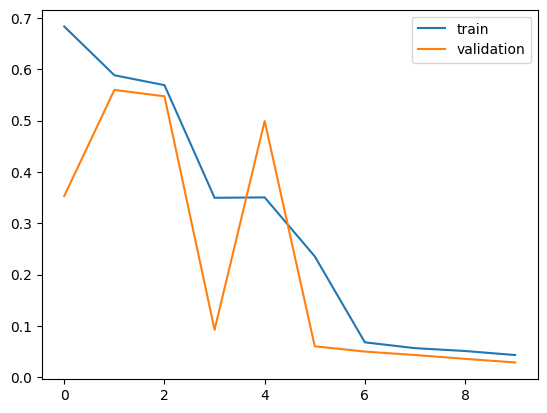

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

### **6. Đánh giá mô hình**

In [25]:
score1 = model.evaluate(X_train, y_train, batch_size=1024)

print("\nĐánh giá trên tập test:")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

print("\nBáo cáo phân loại:")
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
print(metrics.classification_report(y_test, y_pred_classes, 
                                    target_names=label_encoder.classes_))

338/338 ━━━━━━━━━━━━━━━━━━━━ 102s 302ms/step - accuracy: 0.9939 - loss: 0.0290

Đánh giá trên tập test:
Test Accuracy: 0.9939
Test Loss: 0.0297

Báo cáo phân loại:
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    117438
      normal       0.98      0.99      0.99     29183
       probe       0.86      0.89      0.88      1232
         r2l       0.00      0.00      0.00       338
         u2r       0.00      0.00      0.00        16

    accuracy                           0.99    148207
   macro avg       0.57      0.58      0.57    148207
weighted avg       0.99      0.99      0.99    148207



/Users/tranthehuuphuc/Desktop/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tranthehuuphuc/Desktop/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tranthehuuphuc/Desktop/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

## **Yêu Cầu 2: Sinh viên chạy lại tập dữ liệu [CIC IoT dataset 2023](https://www.unb.ca/cic/datasets/iotdataset-2023.html) trên mô hình bài lab này ở cả Multiclass Classification và Binary Classification**

In [3]:
folder_path = "./cic-iot-2023/"

# Check if folder exists
if not os.path.exists(folder_path):
    print(f"Folder {folder_path} does not exist.")
    raise FileNotFoundError(f"Folder {folder_path} does not exist.")

# Get list of all .csv files
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
print(f"Found {len(csv_files)} CSV files.")

# Initialize an empty list to store DataFrames
dfs = []

# Read each CSV file with optimizations
for file in csv_files:
    try:
        # Read CSV with specific dtypes to reduce memory usage
        df_temp = pd.read_csv(file, low_memory=False)
        
        # Drop 'Unnamed: 0' if it exists
        if 'Unnamed: 0' in df_temp.columns:
            df_temp.drop('Unnamed: 0', axis=1, inplace=True)
        
        # Replace inf/-inf with NaN and drop NaN rows
        df_temp.replace([np.inf, -np.inf], np.nan, inplace=True)
        df_temp.dropna(inplace=True)
        
        dfs.append(df_temp)
        print(f"Successfully processed: {file} (shape: {df_temp.shape})")
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Combine all DataFrames
if dfs:
    df = pd.concat(dfs, ignore_index=True)
    print(f"\nCombined DataFrame shape: {df.shape}")
    
    # Final data cleaning on combined DataFrame
    if 'Unnamed: 0' in df.columns:  # Double-check for 'Unnamed: 0'
        df.drop('Unnamed: 0', axis=1, inplace=True)
    
    # Replace inf/-inf with NaN and drop NaN rows
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    
    print(f"Final DataFrame shape after cleaning: {df.shape}")

    print(df.head())
else:
    print("No valid CSV files found in the specified folder.")
    df = pd.DataFrame()

# Display final shape
print(f"\nFinal DataFrame shape: {df.shape}")

Found 63 CSV files.
Successfully processed: ./cic-iot-2023/Merged27.csv (shape: (720714, 40))
Successfully processed: ./cic-iot-2023/Merged33.csv (shape: (793923, 40))
Successfully processed: ./cic-iot-2023/Merged32.csv (shape: (704052, 40))
Successfully processed: ./cic-iot-2023/Merged26.csv (shape: (878917, 40))
Successfully processed: ./cic-iot-2023/Merged18.csv (shape: (714040, 40))
Successfully processed: ./cic-iot-2023/Merged30.csv (shape: (695659, 40))
Successfully processed: ./cic-iot-2023/Merged24.csv (shape: (743186, 40))
Successfully processed: ./cic-iot-2023/Merged25.csv (shape: (700444, 40))
Successfully processed: ./cic-iot-2023/Merged31.csv (shape: (682576, 40))
Successfully processed: ./cic-iot-2023/Merged19.csv (shape: (701962, 40))
Successfully processed: ./cic-iot-2023/Merged35.csv (shape: (920528, 40))
Successfully processed: ./cic-iot-2023/Merged21.csv (shape: (692552, 40))
Successfully processed: ./cic-iot-2023/Merged09.csv (shape: (678866, 40))
Successfully proce

: 

In [ ]:
X = df.drop('Label', axis=1, inplace=True)
y = df['Label']

In [ ]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
X = X[numeric_cols]

for col in X.columns:
    if X[col].std() != 0:
        X[col] = (X[col] - X[col].mean()) / X[col].std()

In [ ]:
y_binary = (y!='Normal').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

model = keras.Sequential()
model.add(keras.layers.GRU(units=64, input_shape=(x_train.shape[1],1)))
model.add(keras.layers.Dropout(rate=0.8))
model.add(keras.layers.Dense(units=y_train.shape[1], activation='sigmoid'))

print("Model architecture:")
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


print("Training model on CIC IoT dataset...")
history = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=1024,
    validation_split=0.2,
    shuffle=False
)

print("Plotting training history...")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

print("Evaluating model...")
score1 = model.evaluate(x_train, y_train, batch_size=1024)

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    df, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

model = keras.Sequential([
    keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    keras.layers.GRU(units=128, return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.GRU(units=64),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=label_encoder.classes_, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("Model architecture:")
model.summary()

print("Training model on CIC IoT dataset...")
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=1024,
    validation_split=0.2,
    verbose=1
)

print("Plotting training history...")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

print("Evaluating model...")
score1 = model.evaluate(x_train, y_train, batch_size=1024)